![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE PHYSICAL SOUTH AMERICA TRAINING

<div style="text-align: right"><i> 01-PHY-02 </i></div>

*Release date: February 2022*


<center><h1>How to visualize maps of Temperature, Salinity, Mixed Layer Depth (MLD) and vector currents</h1></center>

## Notebook 2/2

<div class="alert alert-block alert-warning">
    <h3>Please be sure you have already execute the notebook named <i>"01-PHY-01"</i></h3>
Otherwise this notebook can't be run correctly
</div>

<div class="alert alert-block alert-warning">
    <h3>Please be sure you have already execute the notebook named <i>"01-PHY-01"</i></h3>
Otherwise this notebook can't run correctly
</div>

<div class="alert alert-block alert-warning">
    <h3>Before starting, read carefully the following execution notes</h3>
    <ul><li>
        Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play">
        </i></button> button from the icons menu above the notebook (otherwise press the keyboard shortcut `Shift` + `Enter`).
        </li>
    <li>
        If for any reason the notebook stops working, from the same menu click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the text menu above the icons one, click on "Cell" and select "Run All Above".
        </li></ul>
</div>

***

# Table of contents
- [Setup](#Setup)
- [Exercise n.1: Plot of scalar maps](#Exercise-n.1:-Plot-of-scalar-maps)
- [Exercise n.2: Generate the map of currents](#Exercise-n.2:-Generate-the-map-of-currents)
- [Conclusion](#Conclusion)
***

# Setup

[Go back to the "Table of contents"](#Table-of-contents)

### Import the packages

For avoiding the warning messages during the execution and installation process, at first remove them:

In [1]:
import warnings
warnings.filterwarnings('ignore')

Import the packages:

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# from cartopy import config
import cartopy
import cartopy.crs as ccrs

**getRangeIndexes**: function for getting the indexes of the array *arr* between the *var_min* and *var_max* values:

In [3]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

Check if the expected files are available... 

In [4]:
OUT_DIR = "./data"

In [5]:
import glob
glob.glob(OUT_DIR + "/*.nc")

['./data/2015-04-16.nc',
 './data/2011-08-16.nc',
 './data/2015-05-16.nc',
 './data/2011-01-16.nc']

### Create a dataset from the files

In [6]:
ds = xr.open_mfdataset(glob.glob("./data/*.nc"))

Check the coordinates names (check the ***ds.coords*** outputs) and set the correct coordinates names:

In [7]:
ds.coords

Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 643.6 763.3 902.3
  * latitude   (latitude) float32 -56.0 -55.92 -55.83 ... -36.17 -36.08 -36.0
  * time       (time) datetime64[ns] 2011-01-16T12:00:00 ... 2015-05-16T12:00:00
  * longitude  (longitude) float32 -65.0 -64.92 -64.83 ... -42.17 -42.08 -42.0

### Configure the variables

In [8]:
## Set the coordinates names used in the netcdf (see: ds.coords)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"

Do the same for the variables names (check the ***ds.data_vars*** outputs): 

In [9]:
ds.data_vars

Data variables:
    vo       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    uo       (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>
    thetao   (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 35, 241, 277), meta=np.ndarray>

In [10]:
## Set the variable names
tem_name = "thetao"
uo_name = "uo"
vo_name = "vo"

***

# Exercise n.1: Plot of scalar maps

[Go back to the "Table of contents"](#Table-of-contents)

### Configure the plot

Set the limits for the area: choose the min and max values for the coordinates (and comment with the symbol # the unnecessary ones!):  

In [11]:
## Set lat-lon limits - FULL AREA
lat_min, lat_max = ds[lat_name][0], ds[lat_name][-1]
lon_min, lon_max = ds[lon_name][0], ds[lon_name][-1]

# ## Set lat-lon limits - CUSTOM AREA
# lon_min = -50
# lon_max = -42
# lat_min = -46
# lat_max = -36

In [12]:
## Set the lat/lon indexes
lats_idx = getRangeIndexes(ds[lat_name], lat_min, lat_max)
lons_idx = getRangeIndexes(ds[lon_name], lon_min, lon_max)
## Set lons, lats                                               
lons, lats = ds[lon_name][lons_idx], ds[lat_name][lats_idx]

Set the plot configuration for each variable to plot:

In [13]:
## Set the plot configuration for each variable to plot
variables_conf = {
    "thetao":
        { 
          "min_max": [None, None], # Set the variable's min and max values for the plots and the colorbar 
          "unit": "\u2103",        # unit
          "cmap": "rainbow"         # colorbar palette
        },
    "so":
        { 
          "min_max": [None, None], 
          "unit": "psu",
          "cmap": "rainbow"
        },
    "uo":
        { 
          "min_max": [0, 1], 
          "unit": "m/s",
          "cmap": "rainbow"
        },  
}

In [15]:
## Set the labels for the plot
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'

In [16]:
# Plot configuration
width_inch = 18
height_inch = 8

# Axes labels
title_size = 14

### Generate the maps

[]

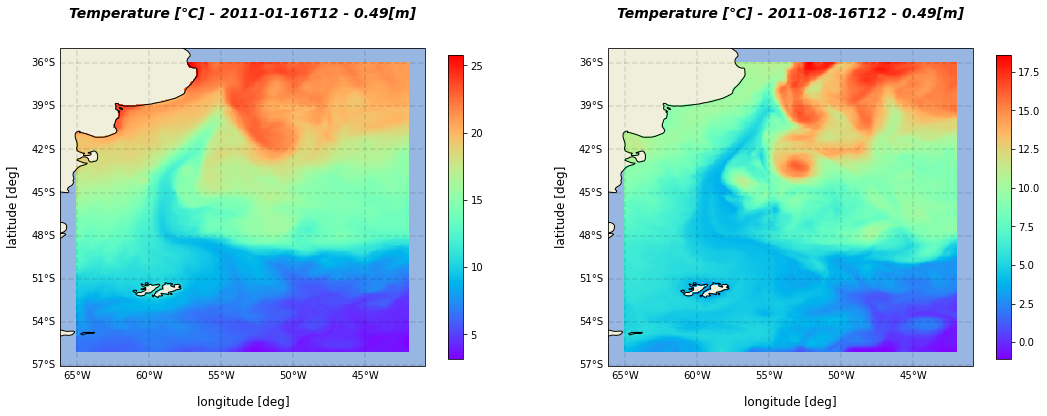

In [18]:
## Set figure
fig = plt.figure(figsize=(width_inch, height_inch))

## Add the plot 1
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2011-01-16T12:00" # selected time
sel_depth = 0 # selected depth in [m]
 
## selected var to plot
var_name = "thetao" # temperature
# var_name = "so" # salinity 
#var_name = "mlotst" # mixed layer depth
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data to plot
data_to_plot = ds[var_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var=data_to_plot.long_name, 
                          unit=variables_conf[var_name]["unit"])
if (dataset_3D):
    data_to_plot = data_to_plot.sel(depth=sel_depth, method="nearest")
    title += " - {depth:.2f}[m]".format(depth=data_to_plot.depth.data)
                                                                     
## Plot map                                                
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.70)
# ax.set_global()


## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


## Add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=30)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])

# ----------------------------------------------------------------------------------# 

## Add the plot 2
ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2011-08-16T12:00" # selected time
sel_depth = 0 # selected depth in [m]

# selected var to plot 
var_name = "thetao" # temperature
# var_name = "so" # salinity 
#var_name = "mlotst" # mixed layer depth
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data to plot
data_to_plot = ds[var_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var=data_to_plot.long_name, 
                          unit=variables_conf[var_name]["unit"])
if (dataset_3D):
    data_to_plot = data_to_plot.sel(depth=sel_depth, method="nearest")
    title += " - {depth:.2f}[m]".format(depth=data_to_plot.depth.data)


## Plot map
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.70)

## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


## Add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=30)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])

### Analysis of the variability of the mixed layer depth in the area.
    
Large uncertainties are usually found where there is an abrupt change in temperature (called thermocline) which is difficult to model accurately. Above the thermocline exists the so called "Mixed Layer" in which the water is well mixed, so all the properties of the water are homogeneous. The vertical extension of the Mixed Layer is shown by the variable Mixed Layer Depth (MLD) .  

Look at the change between the seasons in 2011, how can you explain the changes that you see near 40°S? And the changes near 50°S?


<div class="alert alert-block alert-warning">

### LET'S TRY: Change the plot!

If you want, you can change the above plot.

For example, you could:
- change the variable to plot
- change the area
- change the min/max values for the choosen variable
- change the depth level (only for 3D datasets! ;))

Try to plot salinity at 100m and temperature at 100m 

Go back to [Configure the plot](#Configure-the-plot) and then re-execute the following cells for generating the plot. Try!

***

# Exercise n.2: Generate the map of currents

[Go back to the "Table of contents"](#Table-of-contents)

Several studies of the Malvinas current were performed in that area using GLO MFC products. 

For 2015, with a focus on the 41°S area and the confluence with the Brasil current: 
["Fronts of the Malvinas Current System: Surface and Subsurface Expressions Revealed by Satellite Altimetry, Argo Floats, and Mercator Operational Model Outputs"](https://doi.org/10.1029/2018JC013887) 

For 2011, with a focus on the 51°S area and the water masses in the southern part of the domain:
["Revisiting the Malvinas Current Upper Circulation and Water Masses Using a High-Resolution Ocean Reanalysis"](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JC017271).
 

Let's start by having a look at the surface currents in 2015

### Configure the plot

Set the limits for the area: choose the min and max values for the coordinates (and comment with the symbol # the unnecessary ones!):  

In [19]:
## Set lat-lon limits - FULL AREA
lat_min, lat_max = ds[lat_name][0], ds[lat_name][-1]
lon_min, lon_max = ds[lon_name][0], ds[lon_name][-1]

# ## Set lat-lon limits - CUSTOM AREA
# lon_min = -50
# lon_max = -42
# lat_min = -46
# lat_max = -36

In [20]:
## Set the lat/lon indexes
lats_idx = getRangeIndexes(ds[lat_name], lat_min, lat_max)
lons_idx = getRangeIndexes(ds[lon_name], lon_min, lon_max)
## Set lons, lats                                               
lons, lats = ds[lon_name][lons_idx], ds[lat_name][lats_idx]

In [21]:
## Set the plot configuration for each variable to plot
variables_conf["uo"] =  { 
          "min_max": [-0.5, 1.5], 
          "unit": "m/s",
          "cmap": "jet" }

### Generate the maps

In [25]:
ds.depth

<xarray.DataArray 'depth' (depth: 35)>
array([4.940250e-01, 1.541375e+00, 2.645669e+00, 3.819495e+00, 5.078224e+00,
       6.440614e+00, 7.929560e+00, 9.572997e+00, 1.140500e+01, 1.346714e+01,
       1.581007e+01, 1.849556e+01, 2.159882e+01, 2.521141e+01, 2.944473e+01,
       3.443415e+01, 4.034405e+01, 4.737369e+01, 5.576429e+01, 6.580727e+01,
       7.785385e+01, 9.232607e+01, 1.097293e+02, 1.306660e+02, 1.558507e+02,
       1.861256e+02, 2.224752e+02, 2.660403e+02, 3.181274e+02, 3.802130e+02,
       4.539377e+02, 5.410889e+02, 6.435668e+02, 7.633331e+02, 9.023393e+02],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 3.819 ... 541.1 643.6 763.3 902.3
Attributes:
    valid_min:               0.494025
    valid_max:               902.3393
    units:                   m
    positive:                down
    unit_long:               Meters
    long_name:               Depth
    standard_name:           depth
    axis:                    Z
    _ChunkSizes:             50
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

[]

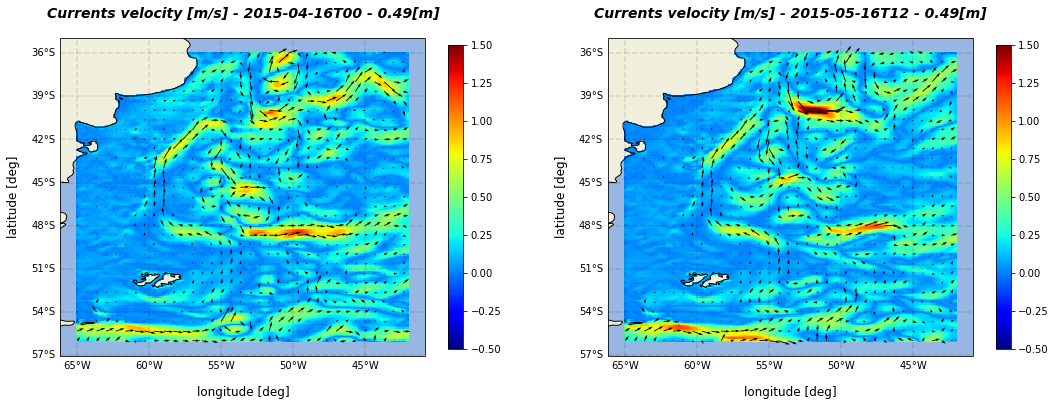

In [28]:
## Set figure
fig = plt.figure(figsize=(width_inch, height_inch))

## Add the plot 1
ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2015-04-16T00:00"
sel_depth = 0 # m
var_name = "uo"
uo_name = "uo"
vo_name = "vo"
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data for plotting
# directions
uo = ds[uo_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
vo = ds[vo_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var="Currents velocity",
                          unit=variables_conf[var_name]["unit"])

if (dataset_3D):
    uo = uo.sel(depth=sel_depth, method="nearest")
    vo = vo.sel(depth=sel_depth, method="nearest") 
    title += " - {depth:.2f}[m]".format(depth=uo.depth.data)
    
# Compute intensity
data_to_plot = (uo**2+uo**2) ** 0.5 

## Plot map and directions
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Filter
skip = 8
uo, vo = uo[::skip,::skip], vo[::skip,::skip]
lons_skp, lats_skp = uo[lon_name], uo[lat_name]

## Plot directions
ax.quiver(lons_skp, lats_skp, uo, vo, transform=ccrs.PlateCarree(), scale=20)

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.7)


## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


## Add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=20)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])


# ----------------------------------------------------------------------------------# 


## Add the plot 2

## Add the plot
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2015-05-16T12:00"
sel_depth = 0
var_name = "uo"
uo_name = "uo"
vo_name = "vo"
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data for plotting
# directions
uo = ds[uo_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
vo = ds[vo_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var="Currents velocity",
                          unit=variables_conf[var_name]["unit"])

if (dataset_3D):
    uo = uo.sel(depth=sel_depth, method="nearest")
    vo = vo.sel(depth=sel_depth, method="nearest") 
    title += " - {depth:.2f}[m]".format(depth=uo.depth.data)
    
# Compute intensity
data_to_plot = (uo**2+uo**2) ** 0.5 

## Plot map and directions
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Filter
skip = 8
uo, vo = uo[::skip,::skip], vo[::skip,::skip]
lons_skp, lats_skp = uo[lon_name], uo[lat_name]

## Plot directions
ax.quiver(lons_skp, lats_skp, uo, vo, transform=ccrs.PlateCarree(), scale=20)

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.7)


## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


## Add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=20)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])

Look at the surface current changes from April 2015 to May 2015
 
The Malvinas Current at 41°S went through two distinct regimes in 2015 referred to as ‘‘weak Malvinas’’ (December 2014 and May–September 2015) and ‘‘strong Malvinas’’ (early January to mid-April 2015 and mid-September to the end of November 2015). The distinct regimes at 41°S can be identified in the in situ and PSY4 velocity components. During the ‘‘strong Malvinas’’ regime the Malvinas Current flows northward 41°S. During the “weak Malvinas” the Malvinas Current retroflects southward and the Brazil Current invades the 41°S section. 



<div class="alert alert-block alert-warning">

### LET'S TRY: Change the plot!

If you want, you can change the above plot.

For example, you could:
- change the time period
- change the area
- change the min/max values for the choosen variable
- change the depth level (only for 3D datasets! ;))
    
Try to change the area with the commented one.
    
Go back to [Configure the plot](#Generate-the-map-of-currents-(vector)) and then re-execute the following cells for generating the plot. Try!

***

# Conclusion

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### Now you know how to plot the Global physical model provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### To go further, you can try to visualize other variables and diagnostics (spatial or vertical averages, standard deviations...)

#### Hope you have enjoyed this session and let's do great science with our data.

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 

[Go back to the "Table of contents"](#Table-of-contents)